In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
import matplotlib.patches as mpatches

In [4]:
df_ref = pd.read_csv('/Users/henryverdoodt/Documents/CODE/DATA/BOXPLOT/CF_windoff_CNRM_1986_2015.csv')
df_model1 = pd.read_csv('/Users/henryverdoodt/Documents/CODE/DATA/BOXPLOT/CF_windoff_CNRM_2016_2045.csv')
df_model2 = pd.read_csv('/Users/henryverdoodt/Documents/CODE/DATA/BOXPLOT/CF_windoff_EARTH_2016_2045.csv')
df_model3 = pd.read_csv('/Users/henryverdoodt/Documents/CODE/DATA/BOXPLOT/CF_windoff_HadGEM_2016_2045.csv')

In [27]:
# Only for solar files

indices_to_remove = sorted(list(range(0, len(df_ref), 8)) + list(range(1, len(df_ref), 8)))
#print(indices_to_remove)
df_ref = df_ref.drop(indices_to_remove).reset_index(drop=True)
df_model1 = df_model1.drop(indices_to_remove).reset_index(drop=True)
df_model2 = df_model2.drop(indices_to_remove).reset_index(drop=True)
df_model3 = df_model3.drop(indices_to_remove).reset_index(drop=True)
#df_ref.reset_index(drop=True, inplace=True)
print(df_ref)


             PT            ES        IT        FR        CH        AT  \
0      0.003426  1.005354e-02  0.090085  0.015421  0.054514  0.068989   
1      0.052339  9.372044e-02  0.347187  0.118102  0.325246  0.315757   
2      0.077995  1.128018e-01  0.223952  0.103086  0.230717  0.196719   
3      0.018523  2.106359e-02  0.006773  0.007820  0.005364  0.001408   
4      0.000000  3.580404e-08  0.000000  0.000000  0.000000  0.000000   
...         ...           ...       ...       ...       ...       ...   
65737  0.330911  3.592361e-01  0.217416  0.233015  0.324525  0.460967   
65738  0.394037  4.020120e-01  0.159402  0.216714  0.256582  0.283824   
65739  0.086020  7.147863e-02  0.005075  0.015060  0.008102  0.000671   
65740  0.000000  0.000000e+00  0.000000  0.000000  0.000000  0.000000   
65741  0.000000  0.000000e+00  0.000000  0.000000  0.000000  0.000000   

             BE        DE        NL        UK        IE            DK   NO  \
0      0.009828  0.022147  0.004149  0.000705

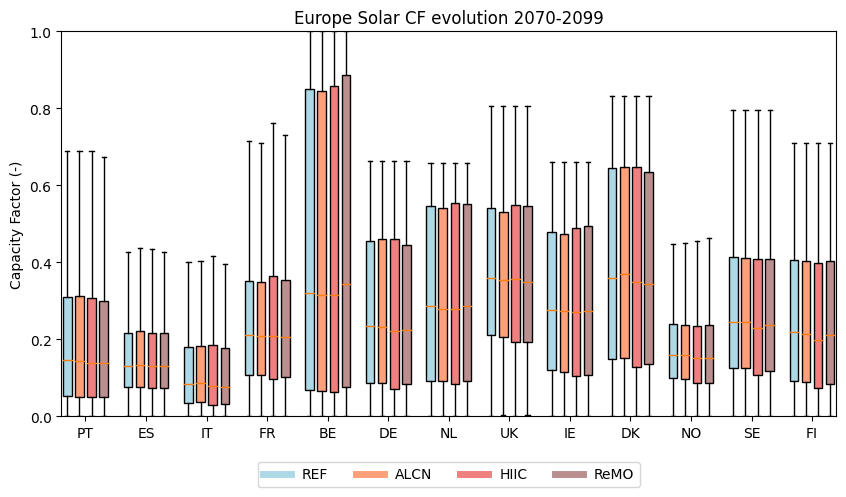

In [5]:
# Create a figure and subplots
countries = df_ref.columns
x = range(len(countries))
width = 0.7
spacing = 1.2
outliers = False

fig, ax = plt.subplots(figsize=(10, 5))

# Plot box plots
flier_properties = dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=3, linewidth=0.2)

box_colors = ['lightblue', 'lightsalmon', 'lightcoral', 'rosybrown']  # Colors for the box plots
'''
handles = []
for i in range(len(countries)):
    if i > 0:
        s = 1
    else:
        s = 0
    bp = ax.boxplot([df_ref.iloc[:, i], df_model1.iloc[:, i], df_model2.iloc[:, i], df_model3.iloc[:, i]],
                    positions=[1+((4+s)*i), 2+((4+s)*i), 3+((4+s)*i), 4+((4+s)*i)], widths=width, patch_artist=True,
                    showfliers=outliers, flierprops=flier_properties)

    # Set colors for box plots
    for box, color in zip(bp['boxes'], box_colors):
        box.set(facecolor=color)
    
    # Add box color patch to the legend handles
    handles.append(mpatches.Patch(color=color))
'''
handles = []
for i, country in enumerate(countries):
    if i > 0:
        s = 1
    else:
        s = 0
    if i < len(df_ref.columns) and i < len(df_model1.columns) and i < len(df_model2.columns) and i < len(df_model3.columns):
        bp = ax.boxplot([df_ref[country], df_model1[country], df_model2[country], df_model3[country]],
                        positions=[1+((4+s)*i), 2+((4+s)*i), 3+((4+s)*i), 4+((4+s)*i)], widths=width, patch_artist=True,
                        showfliers=outliers, flierprops=flier_properties)

        # Set colors for box plots
        for box, color in zip(bp['boxes'], box_colors):
            box.set(facecolor=color)

        # Add box color patch to the legend handles
        handles.append(mpatches.Patch(color=color))

# Set the legend
legend_labels = ['REF (1986-2015)', 'ALCN (2070-2099)', 'HICC (2070-2099)', 'ReMO (2070-2099)']
#ax.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

ax.set_ylim(0, 1)
ax.set_xticks([2.5 + (4+s)*i for i in x])
ax.set_xticklabels(countries)

# Add color line below the graph
color_labels = ['REF', 'ALCN', 'HIIC', 'ReMO'] #['REF (1986-2015)', 'ALCN (2070-2099)', 'HICC (2070-2099)', 'ReMO (2070-2099)']
for i, color in enumerate(box_colors):
    plt.plot([], [], color=color, label=color_labels[i], linewidth=5)

# Show the legend for the color line
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

# Set the title and y-axis label
plt.title('Europe Solar CF evolution 2070-2099') # Europe_Solar_CF_evolution_2070_2099_Boxplot
plt.ylabel('Capacity Factor (-)')
plt.show()

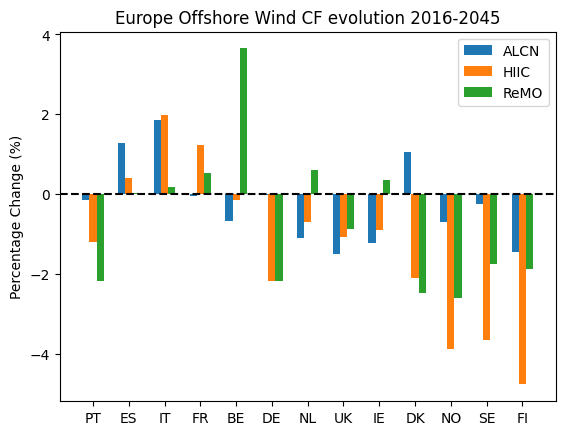

In [6]:
# Calculate the mean change for each model compared to the REF case (in percentage)
mean_change1 = (df_model1.mean() - df_ref.mean()) / df_ref.mean() * 100
mean_change2 = (df_model2.mean() - df_ref.mean()) / df_ref.mean() * 100
mean_change3 = (df_model3.mean() - df_ref.mean()) / df_ref.mean() * 100

# Calculate the standard deviation of each model (in percentage)
std_change1 = df_model1.std()/df_model1.mean() * 100
std_change2 = df_model2.std()/df_model2.mean() * 100
std_change3 = df_model3.std()/df_model3.mean() * 100

# Replace the inf and nan values with 0 (occurs when dividing by zero)
mean_change1 = mean_change1.replace([np.inf, -np.inf, np.nan], 0)
mean_change2 = mean_change2.replace([np.inf, -np.inf, np.nan], 0)
mean_change3 = mean_change3.replace([np.inf, -np.inf, np.nan], 0)

std_change1 = std_change1.replace([np.inf, -np.inf, np.nan], 0)
std_change2 = std_change2.replace([np.inf, -np.inf, np.nan], 0)
std_change3 = std_change3.replace([np.inf, -np.inf, np.nan], 0)

# If Change compared to the REF case is greater than a Threshold, put this value to zero. Seen as 'noice'
thres = 50000 # Percentage Threshold

std_change1 = std_change1.mask(std_change1.abs() > thres, 0)
std_change2 = std_change2.mask(std_change2.abs() > thres, 0)
std_change3 = std_change3.mask(std_change3.abs() > thres, 0)

mean_change1 = mean_change1.mask(mean_change1.abs() > thres, 0)
mean_change2 = mean_change2.mask(mean_change2.abs() > thres, 0)
mean_change3 = mean_change3.mask(mean_change3.abs() > thres, 0)
#print(mean_change2)

# Plot the data
countries = df_ref.columns
x = range(len(countries))
width = 0.2

fig, ax = plt.subplots();
ax.bar(x, mean_change1, width, label='ALCN')
ax.bar([i + width for i in x], mean_change2, width, label='HIIC')
ax.bar([i + 2*width for i in x], mean_change3, width, label='ReMO')

'''
# Plot std lines
for i in x:
    ax.plot([i, i], [(mean_change1[i] - std_change1[i]), (mean_change1[i] + std_change1[i])], color='black', linewidth=0.8);
    ax.plot([i+width, i+width], [(mean_change2[i] - std_change2[i]), (mean_change2[i] + std_change2[i])], color='black', linewidth=0.8);
    ax.plot([i+2*width, i+2*width], [(mean_change3[i] - std_change3[i]), (mean_change3[i] + std_change3[i])], color='black', linewidth=0.8);
'''

ax.axhline(0, color='black', linestyle='--')  # Zero line
#ax.set_ylim(-15000, 100000) #ax.set_ylim(-150, 100)   #ax.set_ylim(-40, 20).  (-17, 17)

ax.set_xticks([i + width for i in x])
ax.set_xticklabels(countries)
ax.legend()

# Set the title and y-axis label
plt.title('Europe Offshore Wind CF evolution 2016-2045') #. Europe_Onshore_Wind_CF_evolution_2070_2099_Autumn
plt.ylabel('Percentage Change (%)')
plt.show()